<a href="https://colab.research.google.com/github/Divyesh-Kanagavel/deep_learning--keras/blob/master/dlconvcet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A small convnet


In [1]:
!pip install kaggle


In [2]:
! mkdir ~/.kaggle


In [3]:
cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.7MB/s]
 98% 265M/271M [00:02<00:00, 141MB/s]
100% 271M/271M [00:02<00:00, 122MB/s]
100% 543M/543M [00:03<00:00, 165MB/s]



In [6]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [7]:
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [8]:
import os,shutil
original_dataset_dir = '/content/train'
base_dir = '/content/cats_and_dogs_small'
os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)


In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


In [11]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir,fname)
  shutil.copy(src,dst)
  

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_cats_dir, fname)
  shutil.copy(src,dst)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_cats_dir, fname)
  shutil.copy(src,dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(train_dogs_dir, fname)
  shutil.copy(src,dst)

In [15]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(validation_dogs_dir, fname)
  shutil.copy(src,dst)

In [16]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir,fname)
  dst = os.path.join(test_dogs_dir, fname)
  shutil.copy(src,dst)

In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))



In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [19]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'] )


In [20]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20, class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 45s 118ms/step - loss: 0.6889 - acc: 0.5270 - val_loss: 0.6918 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6633 - acc: 0.5925 - val_loss: 0.6541 - val_acc: 0.6010
Epoch 3/30
100/100 [==============================] - 12s 118ms/step - loss: 0.6187 - acc: 0.6655 - val_loss: 0.6397 - val_acc: 0.6190
Epoch 4/30
100/100 [==============================] - 12s 119ms/step - loss: 0.5744 - acc: 0.7000 - val_loss: 0.5964 - val_acc: 0.6750
Epoch 5/30
100/100 [==============================] - 12s 117ms/step - loss: 0.5356 - acc: 0.7300 - val_loss: 0.6570 - val_acc: 0.6080
Epoch 6/30
100/100 [==============================] - 12s 116ms/step - loss: 0.5118 - acc: 0.7415 - val_loss: 0.5781 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 12s 117ms/step - loss: 0.4948 - acc: 0.7560 - val_loss: 0.5604 - val_acc: 0.7210
Epoch 8/30
100/100 [==============================] - 1

In [22]:
model.save('cats_and_dogs_small.h5')

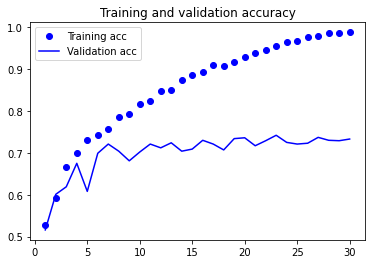

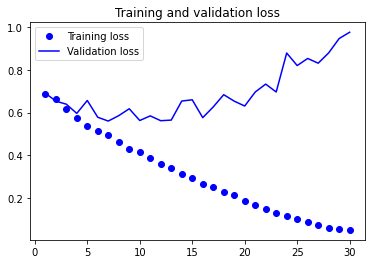

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

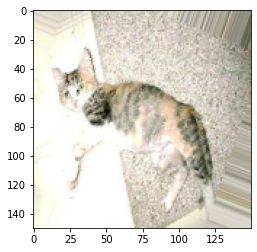

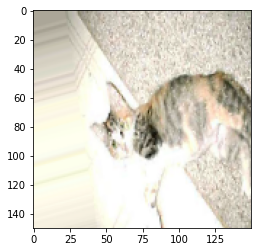

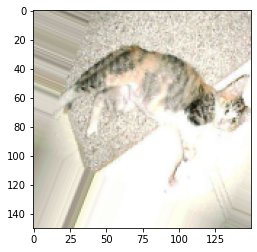

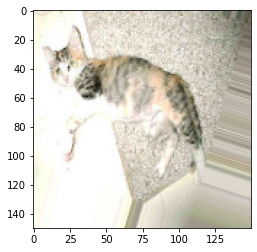

In [25]:
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[20]
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4 == 0:
    break

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss = 'binary_crossentropy',metrics=['acc'])


In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40, width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150,150), batch_size=32,class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
history = model.fit_generator(train_generator, steps_per_epoch=63,epochs=30, validation_data=validation_generator,validation_steps=31)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
63/63 [==============================] - 23s 332ms/step - loss: 0.6963 - acc: 0.5020 - val_loss: 0.6873 - val_acc: 0.5736
Epoch 2/30
63/63 [==============================] - 21s 326ms/step - loss: 0.6882 - acc: 0.5500 - val_loss: 0.6895 - val_acc: 0.5010
Epoch 3/30
63/63 [==============================] - 21s 330ms/step - loss: 0.6832 - acc: 0.5365 - val_loss: 0.6634 - val_acc: 0.5917
Epoch 4/30
63/63 [==============================] - 21s 330ms/step - loss: 0.6757 - acc: 0.5880 - val_loss: 0.6537 - val_acc: 0.5958
Epoch 5/30
63/63 [==============================] - 21s 330ms/step - loss: 0.6643 - acc: 0.5955 - val_loss: 0.6578 - val_acc: 0.5948
Epoch 6/30
63/63 [==============================] - 21s 330ms/step - loss: 0.6551 - acc: 0.6140 - val_loss: 0.6332 - val_acc: 0.6270
Epoch 7/30
63/63 [==============================] - 21s 332ms/step - loss: 0.6536 - acc: 0.6035 - val_loss: 0.6491 - val_acc: 0.6099
Epoch 8/30
63/63 [==============================] - 21s 333ms/step - 

In [30]:
model.save('cats_and_dogs_better.h5')

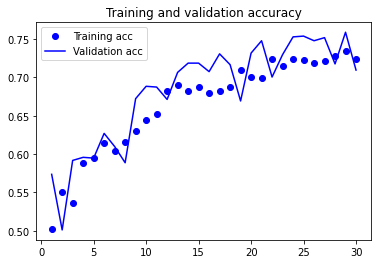

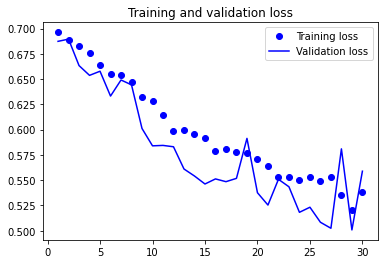

In [31]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Pretrained convnets - VGG16

In [32]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [33]:
datagen = ImageDataGenerator(rescale=1./255)
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(directory, target_size=(150,150),batch_size=20,class_mode='binary')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*20:(i+1)*20] = features_batch
    labels[i*20:(i+1)*20] = labels_batch
    i+=1
    if i*20>=sample_count:
      break
  return features, labels

In [34]:
import numpy as np
train_features,train_labels = extract_features(train_dir, 2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_labels = extract_features(test_dir, 1000)
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),loss='binary_crossentropy',metrics=['acc'])

history = model.fit(train_features, train_labels,epochs=30,batch_size=20,validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 0.4485 - acc: 0.7835 - val_loss: 0.4220 - val_acc: 0.7870
Epoch 2/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3008 - acc: 0.8750 - val_loss: 0.2780 - val_acc: 0.8930
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2361 - acc: 0.9090 - val_loss: 0.2617 - val_acc: 0.8900
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1966 - acc: 0.9185 - val_loss: 0.2438 - val_acc: 0.9050
Epoch 5/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1745 - acc: 0.9355 - val_loss: 0.2440 - val_acc: 0.8960
Epoch 6/30
100/100 [==============================] - 1s 5ms/step - loss: 0.1537 - acc: 0.9390 - val_loss: 0.2843 - val_acc: 0.8830
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.1322 - acc: 0.9505 - val_loss: 0.2418 - val_acc: 0.9010
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

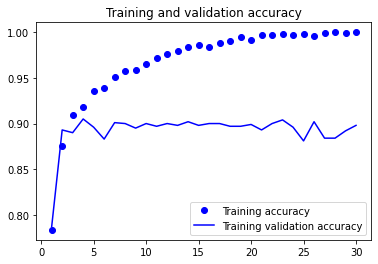

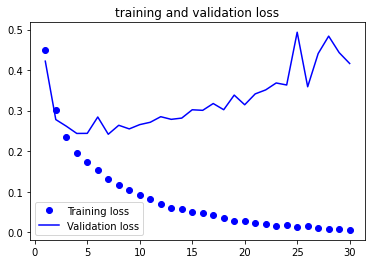

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Training validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

The more expensive method - training conv_base and the densely connected layer together

In [39]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [41]:
conv_base.trainable = False

In [43]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=2e-5), metrics=['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 28s 271ms/step - loss: 0.5924 - acc: 0.6875 - val_loss: 0.4625 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 27s 269ms/step - loss: 0.4830 - acc: 0.7870 - val_loss: 0.3795 - val_acc: 0.8610
Epoch 3/30
100/100 [==============================] - 27s 267ms/step - loss: 0.4309 - acc: 0.8165 - val_loss: 0.3398 - val_acc: 0.8680
Epoch 4/30
100/100 [==============================] - 27s 267ms/step - loss: 0.3990 - acc: 0.8235 - val_loss: 0.3187 - val_acc: 0.8690
Epoch 5/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3868 - acc: 0.8320 - val_loss: 0.3120 - val_acc: 0.8700
Epoch 6/30
100/100 [==============================] - 27s 265ms/step - loss: 0.3675 - acc: 0.8385 - val_loss: 0.2878 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3579 - acc: 0.8490 - val_loss: 0.2778 - val_acc: 0.8900
Epoch 8/30
100/100 [==============================] - 2

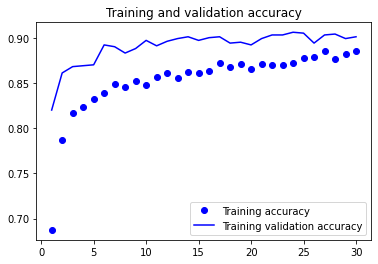

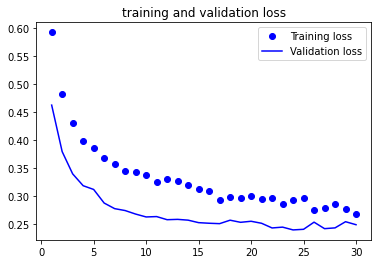

In [44]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Training validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Fine-tuning-another technique to use pre-trained convnets

In [45]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [46]:
#unfreeze only the last layer of conv_base -> to train the specific features of the problem at hand
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True

  if set_trainable:
    layer.trainable = True
  else:
    layer_trainable = False


In [47]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(learning_rate=1e-5), metrics = ['acc'])
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs = 30, validation_data = validation_generator, validation_steps = 50) 

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 47s 428ms/step - loss: 0.3034 - acc: 0.8845 - val_loss: 0.1992 - val_acc: 0.9270
Epoch 2/30
100/100 [==============================] - 42s 422ms/step - loss: 0.2078 - acc: 0.9160 - val_loss: 0.1164 - val_acc: 0.9480
Epoch 3/30
100/100 [==============================] - 42s 421ms/step - loss: 0.1680 - acc: 0.9365 - val_loss: 0.2169 - val_acc: 0.9350
Epoch 4/30
100/100 [==============================] - 42s 422ms/step - loss: 0.1417 - acc: 0.9385 - val_loss: 0.1820 - val_acc: 0.9380
Epoch 5/30
100/100 [==============================] - 42s 422ms/step - loss: 0.1303 - acc: 0.9525 - val_loss: 0.0991 - val_acc: 0.9570
Epoch 6/30
100/100 [==============================] - 42s 422ms/step - loss: 0.1099 - acc: 0.9555 - val_loss: 0.1015 - val_acc: 0.9620
Epoch 7/30
100/100 [==============================] - 42s 421ms/step - loss: 0.1020 - acc: 0.9635 - val_loss: 0.1239 - val_acc: 0.9580
Epoch 8/30
100/100 [==============================] - 4

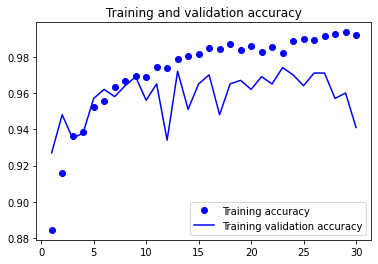

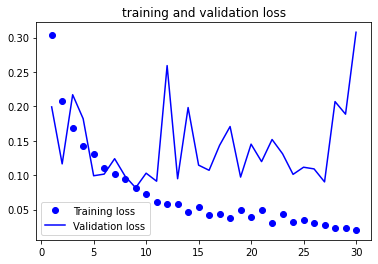

In [48]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Training validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

Smoothen the curve

In [49]:
def smooth_curve(points , factor = 0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous*factor + point*(1-factor))
    else:
      smoothed_points.append(point)

  return smoothed_points

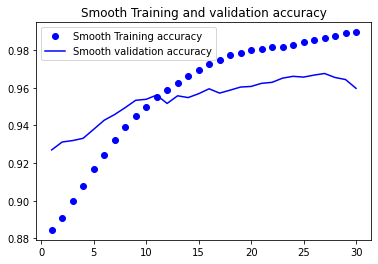

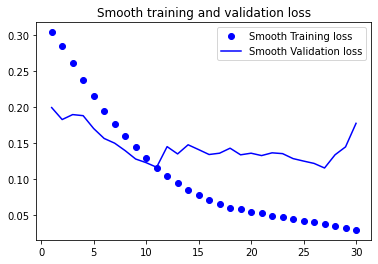

In [50]:
plt.plot(epochs, smooth_curve(acc), 'bo', label = 'Smooth Training accuracy')
plt.plot(epochs, smooth_curve(val_acc), 'b', label = 'Smooth validation accuracy')
plt.title('Smooth Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label = 'Smooth Training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label = 'Smooth Validation loss')
plt.title('Smooth training and validation loss')
plt.legend()
plt.show()

In [52]:
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150,150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator,steps=50 )
print('test_acc:', test_acc )

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test_acc: 0.9440000057220459
